# Bayesian aproach of combining prior and new info

We are going to make a movie and are deciding on a ganre, choosing form  four options: 1) comedy, 2) action, 3)historical, 4) sci-fi.
Onle one choice leads to a Success, and we want to pick it and make a successfull movie.

__We have some ideas__ (_prior probabilities_) from our experience of what movie ganre is going to lead to success:
| comdy | action | historical | sci-fi |
| ----- | ------ | ---------- | ------ |
| 0.33  | 0.3    | 0.2        | 0.17   |

If we had only this information we would always choose to make a (1) comedy.

__But we alos have Bob!__ Bob is a trusted, but really strange, fellow - who has a "gut feeling": asked about what ganre to choose Bob either smile or not, whithout saying what he means by this. We don't know how exactly to interpret his reaction, but we know that there are _likelihoods_ associated with Bob such that:
- if 1) comedy is going to be the Success, the chance that Bob smiles is 50%,
- if 2) action is going to be the Success, the chance that Bob smiles is 20%,
- if 3) historical is going to be the Success, the chance that Bob smiles is 50%,
- if 4) sci-fi is going to be the Success, the chance that Bob smiles is 75%.

| comdy | action | historical | sci-fi |
| ----- | ------ | ---------- | ------ |
| 50%   | 20%    | 50%        | 75%    |

Without any other info except of these likelihoods (no priors), if we saw Bob smiling we would always go with (4) sci-fi.

This being siad, the best approach is Bayesian, i.e. to combine our prior knowledge with Bob's intuition - and that is what we are going to demonstrate via a simulation below.



In [70]:
import numpy as np
import matplotlib.pyplot as plt

In [71]:
prior_probabilities = np.array([[0.33, 0.3], [0.2,0.17]])

Text(0.5, 1.0, 'Prior Probabilities')

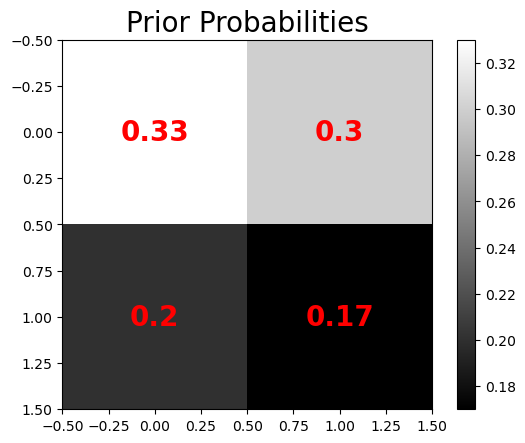

In [72]:
plt.imshow(prior_probabilities, cmap='gray')
plt.colorbar()

for i in range(2):
    for j in range(2):
        plt.annotate(prior_probabilities[i,j], (j,i), color="red", fontsize=20, fontweight='bold', ha='center', va='center')
        
plt.title('Prior Probabilities', fontsize=20)

In [73]:
bob_likelihoods = np.array([[0.5, 0.2], [0.5, 0.75]])

Text(0.5, 1.0, 'Bob Smile Probabilities')

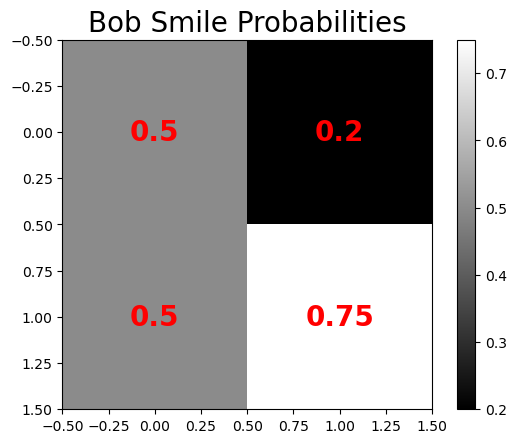

In [74]:
plt.imshow(bob_likelihoods, cmap='gray')
plt.colorbar()

for i in range(2):
    for j in range(2):
        plt.annotate(bob_likelihoods[i,j], (j,i), color="red", fontsize=20, fontweight='bold', ha='center', va='center')
        
plt.title('Bob Smile Probabilities', fontsize=20)

# Posterior Probability
$P(S_i|\text{smile}) \propto P(\text{smile}|S_i) \times P(S_i)$

$P(S_i|\text{NO smile}) \propto P(\text{NO smile}|S_i) \times P(S_i)$
___

## So, if Bob smiles
$P(\text{ganre}_1|\text{smile}) \propto P(\text{smile}|\text{ganre}_1)P(\text{ganre}_1) = 0.5 \times 0.33 = 0.165$ = __max__

$P(\text{ganre}_2|\text{smile}) \propto P(\text{smile}|\text{ganre}_2)P(\text{ganre}_2) = 0.2 \times 0.3 = 0.06$

$P(\text{ganre}_3|\text{smile}) \propto P(\text{smile}|\text{ganre}_3)P(\text{ganre}_3) = 0.5 \times 0.2 = 0.1$

$P(\text{ganre}_4|\text{smile}) \propto P(\text{smile}|\text{ganre}_4)P(\text{ganre}_4) = 0.75 \times 0.17 = 0.128$

## $\to$ Choose ganre 1
___

## And if Bob does not smile
$P(\text{ganre}_1|\text{NO smile}) \propto P(\text{NO smile}|S_0)P(\text{ganre}_1) = 0.5 \times 0.33 = 0.165$

$P(\text{ganre}_2|\text{NO smile}) \propto P(\text{NO smile}|S_1)P(\text{ganre}_2) = 0.8 \times 0.3 = 0.24$ = __max__

$P(\text{ganre}_3|\text{NO smile}) \propto P(\text{NO smile}|S_2)P(\text{ganre}_3) = 0.5 \times 0.2 = 0.1$

$P(\text{ganre}_4|\text{NO smile}) \propto P(\text{NO smile}|S_3)P(\text{ganre}_4) = 0.25 \times 0.17 = 0.043$
## Choose ganre 2
___

# Simulation
We assume the true probabilities are the same as our prior probabilities and generate which ganre is successful according to them.

In [75]:
def generate_ganre(prior_probabilities):
    u = np.random.random()
    cumulative_probs = prior_probabilities.flatten().cumsum()
    ganre = np.where(u < cumulative_probs)[0][0]
    return ganre
print("Successful ganre is:", generate_ganre(prior_probabilities))

Successful ganre is: 1


In [76]:
def get_bob_smile(ganre, bob_likelihoods):
    '''Compute Bob's reaction based on the ganre'''
    i, j = ganre%2, ganre//2  # convert ganre (0, 1, 2, 3) into a binary coordinate representing one of the 4 squares in the 2x2 box
    u = np.random.random()  # generate a random number 
    return u < bob_likelihoods[j, i]  # return 0 or 1 representing Bob's reaction (for each square Bob has a probability to Smile)

In [77]:
def get_posterior_probs(prior_probabilities, bob_likelihoods, bob_smile):
    ''' Compute posterior probabilities based on the prior probabilities and the knowldege of whether Bob has smiled or not'''
    likelihoods = bob_likelihoods if bob_smile else (1 - bob_likelihoods)
    posterior_probs = prior_probabilities * likelihoods
    return posterior_probs

In [78]:
def show_probs(bob_smile, probs):
    '''Visualize posterior probabilities'''
    plt.imshow(probs, cmap='gray')
    plt.colorbar()

    for i in range(2):
        for j in range(2):
            plt.annotate(round(probs[i,j],3), (j,i), color="red", fontsize=20, fontweight='bold', ha='center', va='center')

    plt.title('Posterior Probabilities\nBob Smile = %s'%bob_smile, fontsize=20)
    plt.show()

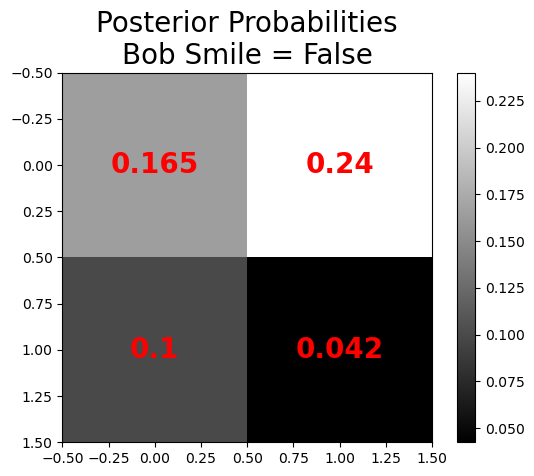

In [79]:
ganre = generate_ganre(prior_probabilities)  # generate a random range
bob_smile = get_bob_smile(ganre, bob_likelihoods)  # simulate probabilistically if Bob smiles 
posterior_probs = get_posterior_probs(prior_probabilities, bob_likelihoods, bob_smile)  # calculate the posterior probability
show_probs(bob_smile, posterior_probs)  # visualize posterior probabilities

In [80]:
trials = 100_000

actual_ganres = []
prior_preds = []
Bob_preds = []
posterior_preds = []

for _ in range(trials):
    ganre = generate_ganre(prior_probabilities)  # generate a random range
    bob_smile = get_bob_smile(ganre, bob_likelihoods)  # simulate probabilistically if Bob smiles 
    posterior_probs = get_posterior_probs(prior_probabilities, bob_likelihoods, bob_smile)  # calculate the posterior probability
    actual_ganres.append(ganre)  # successful action
    prior_preds.append(0)  # action based just on prior
    Bob_preds.append(3 if bob_smile else 1)  # action based just on Bob
    posterior_preds.append(np.argmax(posterior_probs.flatten()))  # action based on the posterior

In [81]:
prior_acc = np.mean(np.array(prior_preds) == np.array(actual_ganres))  # compute the % of right guesses based on prior
Bob_acc = np.mean(np.array(Bob_preds) == np.array(actual_ganres))  # compute the % of right guesses based on Bob
posterior_acc = np.mean(np.array(posterior_preds) == np.array(actual_ganres))  # compute the % of right guesses based on posterior

In [82]:
print('Prior Accuracy: %s'%prior_acc)
print('Bob Accuracy: %s'%Bob_acc)
print('Posterior Accuracy: %s'%posterior_acc)

Prior Accuracy: 0.33088
Bob Accuracy: 0.36369
Posterior Accuracy: 0.40279


# Conclusion
As you can see for this example the Bayesian approach of using posterioirs gives the best result